# Micro Credit  defaulter Project

Data observation : Dataset contains the Mobile network data,customer how many times he recharged his cell phone and how much money his used per day ,how many times he took micro credit loan and with in how many days paid back ,data rechearge, also contains how amany times he recharged with in 30 days and 90 days  

Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [3]:
#loading the data set 
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Exploring the data anayasis

In [4]:
#checking how may rows and columns present in dataset
df.shape

(209593, 37)

Observation: the dataset contains the 209594 rows and 38 columns 

In [5]:
#checking data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

#### Observation: only 3 variables contain the object data type ,12 variable contains int data type 22 variable contain the float data type

In [6]:
#pdate column is object dtype so we need to convert to Date type

df['pdate'] = pd.to_datetime(df['pdate'])

In [7]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Observation: unamed column just contain only soloman number

In [8]:
len(pd.unique(df['msisdn']))

186243

##### Observation column: Variable "msisdn" only contain 186243 unique values, we come to know that column contain the duplicate data

In [9]:
#to check is there any null values 
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Observation: dataset contains the No Null values

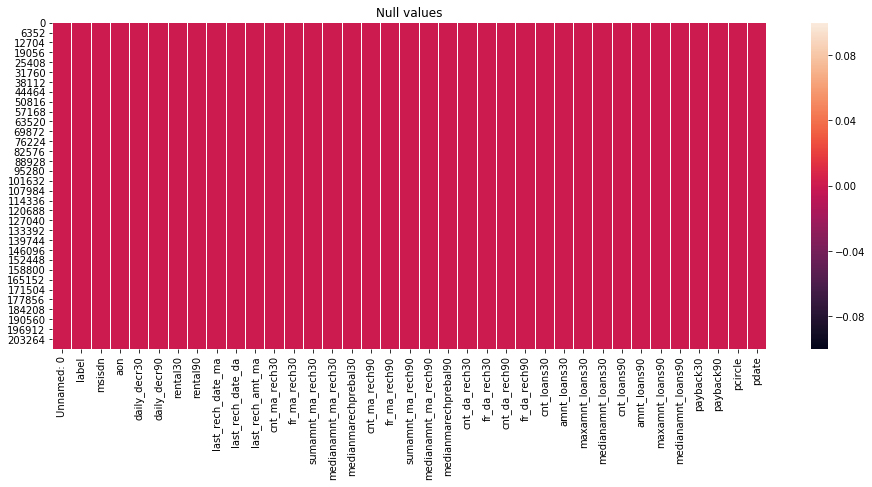

In [9]:
#Heat map to check the null values

plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: Data set not contains the null values 

In [10]:
#to check the classification in target variable
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Observation: the taget vaaiable have Two classifications "Zero" and "One"   Zero means defaulters and one mean NonDefaulters

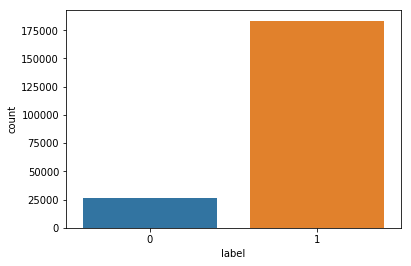

In [11]:
#univariate analysis
sns.countplot(df['label'])
plt.show()

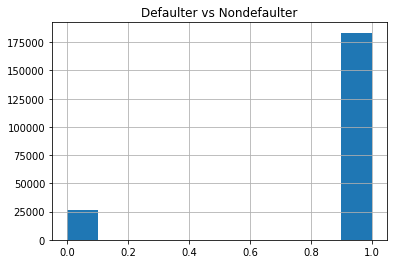

In [12]:
df['label'].hist(grid=True)
plt.title('Defaulter vs Nondefaulter')
plt.show()

Observation: Defaulter are less compare to non defaulter, Need to treat the data further 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


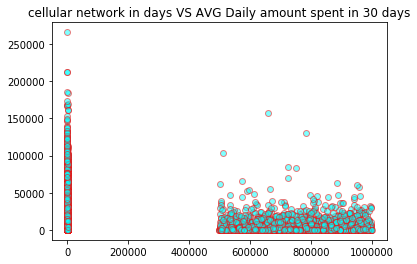

In [12]:
#Mutivaient analysis
plt.scatter(df['aon'], df['daily_decr30'], alpha=0.5, c=(0,1,1),edgecolors='r')
plt.title('cellular network in days VS AVG Daily amount spent in 30 days')
plt.show()

Observation : we cant see there is much relation between Avg on network and recharge amount in data

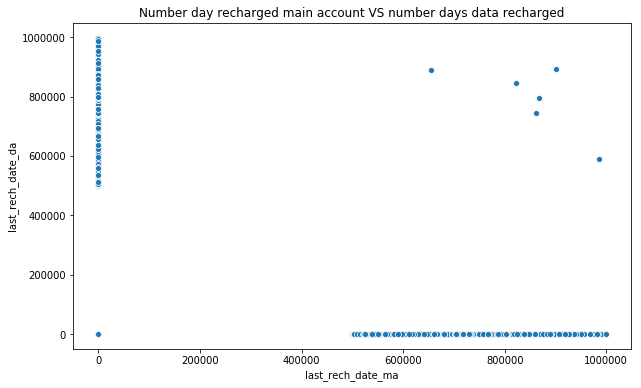

In [14]:
plt.figure(figsize=[10,6])
plt.title('Number day recharged main account VS number days data recharged')
sns.scatterplot(df['last_rech_date_ma'],df['last_rech_date_da'])

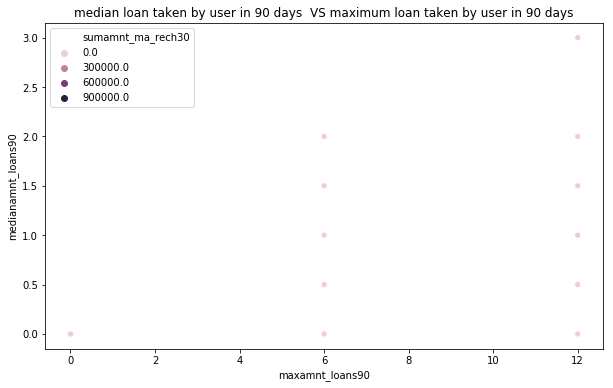

In [15]:
plt.figure(figsize=[10,6])

plt.title('median loan taken by user in 90 days  VS maximum loan taken by user in 90 days')
sns.scatterplot(df['maxamnt_loans90'],df['medianamnt_loans90'], hue=df['sumamnt_ma_rech30']);

#check the correlation 

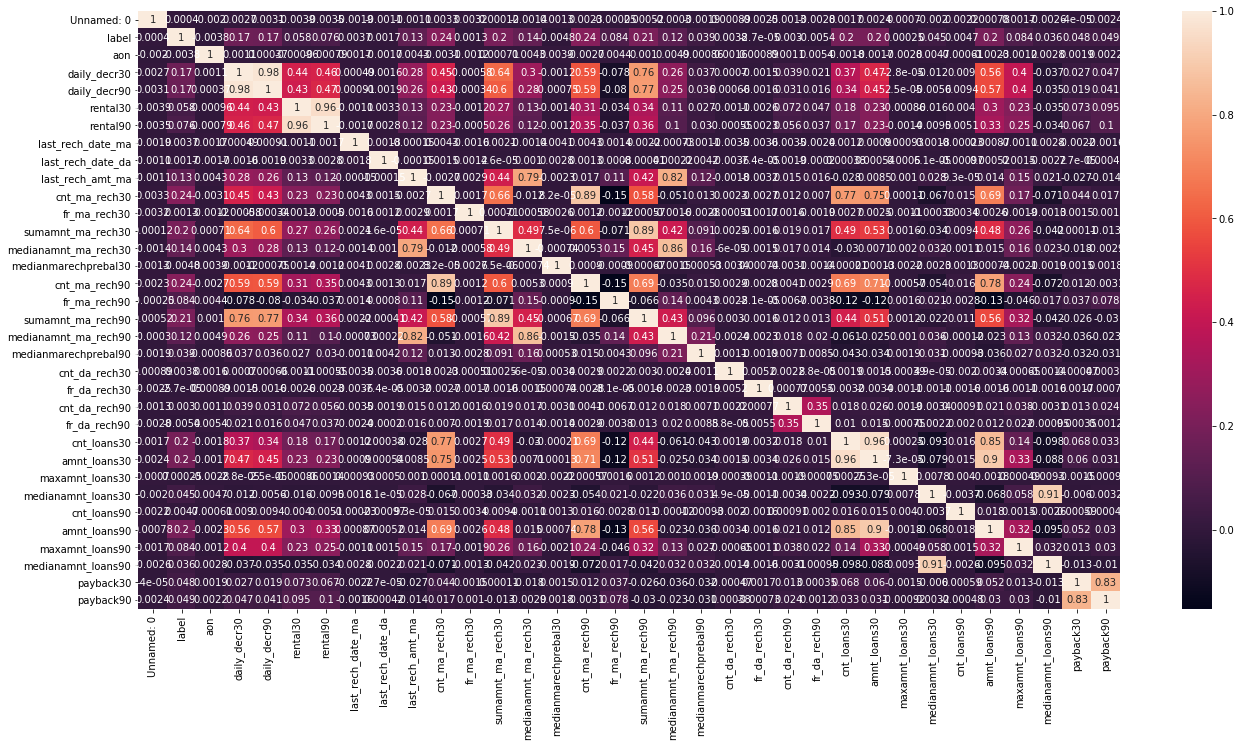

In [16]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(22,11))
sns.heatmap(corr_hmap, annot=True)
plt.show()




Observation: "msisdn" and "Pcircle" is not reflecting in correation heat map due to data type is object

Msisdn columns we have to label encode Then check the corelation




In [13]:
#to display the
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending = False)


label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

Observation: 8 variables co-relation with target variable is alomost zero (0.001)

In [14]:
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['msisdn'] = le.fit_transform(df['msisdn'])



In [15]:
#Droping the column "Pcircle "
#removing the un named column that contains only solman number 

df=df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['pcircle'], axis=1)

In [16]:
#Separating the date column

df1 =df.drop(['pdate','msisdn'],axis=1)

In [17]:
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


Observation: Two columns Msisdn and pdate columns removed from the data set , we will merge the these two column further  

Check the Data distribution among all other columns

In [ ]:
#plot histogram
df1.hist(bins=20,figsize=(20,20))
plt.show()

In [ ]:
df1.plot(kind ='density', subplots = True, layout=(7,5), sharex=False, legend=False, fontsize=1, figsize=(15,10))
plt.show()

Observation: most of the variables data is not distributes normaly  data is skiwed

In [18]:
#Spliting the independent and target variables in  x and y 
x =df.drop(['label','pdate'], axis=1)
y = df['label']

We have splited the data into x and y datasets

In [19]:
#checking skeweness
#anyvalues between +0.5 to -0.5 skewness is acceptabel  reamining need to treatt
# log, sqrt, cfrt, box cox, power_tranform
#no need to correct the skewness for categorical columns 
x.skew()


msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can see the skewness  in the dataset, we will remove the skewness using power transform function

In [20]:
#seprating the categoricall variable form 
#x_df= x.drop(['msisdn','pdate'], axis=1)

In [ ]:
#box plot 

for i in x_df:
    plt.figure()
    sns.boxplot(x_df[i])
plt.show()

Observation: Most of the column have outliers need to treat them 

# Spliting the data into training set and test set

In [21]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

### Normalizing the data using minmax scaler

In [22]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[8.32089432e-02 1.02409344e-03 3.66755014e-02 ... 0.00000000e+00
  1.36054422e-02 1.36054422e-02]
 [1.28880704e-01 2.88026281e-04 3.91686289e-04 ... 0.00000000e+00
  3.88726919e-02 3.88726919e-02]
 [9.99033516e-01 4.61042068e-04 3.66688076e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.45231473e-01 2.65024182e-04 3.80722161e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.29043932e-01 1.04009490e-04 4.00812204e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.47049538e-01 1.29611826e-03 1.25029134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [23]:
scal_xtrain.shape

(167674, 33)

In [ ]:
#to detect and remove outlers using Zscore 

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)


In [ ]:
#Let’s try and define a threshold to identify an outlier.

threshold = 3
print(np.where(z > 3))


In [ ]:
print(z[1][1])


In [ ]:
#IQR score -

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


#lower limit=Q1−(IQR×multiplier)

#upper limit=Q3+(IQR×multiplier)

In [ ]:
#print(x_df < (Q1 - 1.5 * IQR)) |(x_df > (Q3 + 1.5 * IQR))

In [ ]:
df_o = x[(z < 3).all(axis=1)]

In [ ]:
df_o.shape

#### df.shape

Observation: after removing the outliers from the dataset we have rows: 161465,  columns:32 we have lost 48128 rows 
we are lossing 22.96 % of data 

In [ ]:
#box plot 

for i in df_o:
    plt.figure()
    sns.boxplot(df_o[i])
plt.show()

Observation: still some outliers data we can see 

In [25]:
df_o.skew()

NameError: name 'df_o' is not defined

In [ ]:
for i in df_o.columns:
    if df_o[i].skew()>0.5 :
        df_o[i]=np.cbrt(df_o[i])
    if df_o[i].skew()<-0.5:
        df_o[i]=np.cbrt(df_o[i])
df_o.skew()

### After apply CBRT method to normalize the data set we got 15 column below 0.5 

In [ ]:
df.head()

In [ ]:
df_o.tail()

In [ ]:
df_o.isnull().sum()

Observation: there is null values in dataset

#Handling classs imbalanced problem by oversampling the minority classs

#import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()


x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

In [ ]:
y_over.value_counts()

# logistic regression

In [51]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)

[1 1 1 ... 1 1 1]


In [52]:
print("accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8756172618621627
[[   74  5148]
 [   66 36631]]
              precision    recall  f1-score   support

           0       0.53      0.01      0.03      5222
           1       0.88      1.00      0.93     36697

   micro avg       0.88      0.88      0.88     41919
   macro avg       0.70      0.51      0.48     41919
weighted avg       0.83      0.88      0.82     41919



### DecisionTree model 

In [53]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


0.8672916815763735


In [54]:
#AUC ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [1]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

NameError: name 'lg' is not defined

In [41]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)


In [42]:
thresholds

array([2.        , 1.        , 1.        , ..., 0.22708261, 0.20049501,
       0.17797412])

In [43]:
tpr

array([0.        , 0.04169278, 0.04368204, ..., 0.99997275, 1.        ,
       1.        ])

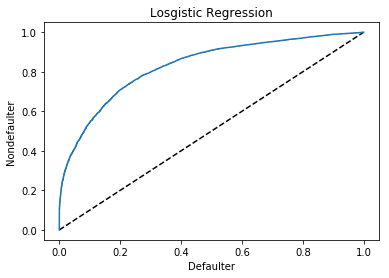

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Defaulter')
plt.ylabel('Nondefaulter ')
plt.title('Losgistic Regression')
plt.show()


In [46]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [47]:
print(auc_score)

0.5061861518197189


In [48]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())


[0.86405057 0.86354636 0.86413951 0.86390095 0.86635813]
0.8643991046924555


In [50]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.86 accuracy with a standard deviation of 0.00


### RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score
0.9130704453827619
[[ 2265  2957]
 [  687 36010]]
              precision    recall  f1-score   support

           0       0.77      0.43      0.55      5222
           1       0.92      0.98      0.95     36697

   micro avg       0.91      0.91      0.91     41919
   macro avg       0.85      0.71      0.75     41919
weighted avg       0.90      0.91      0.90     41919



Random forest model accuracy we are getting 91% 

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[ 2265  2957]
 [  687 36010]]


0.9130704453827619

Observation: Confusion matrix accuracy also getting 91%

### SVM model

In [ ]:
#importing the svm model
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

##### Making Predictions

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))